In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
xi1 = np.load('../xi_1.npy')
xi2 = np.load('../xi_2.npy')

In [7]:
np.dot(xi1, xi1) / len(xi1)

0.6808986745193095

In [8]:
xi1.var()

0.6808986745193099

In [9]:
xi1_hat = (xi1 - xi1.mean()) / xi1.std()

In [11]:
np.dot(xi1_hat, xi1_hat) / len(xi1_hat)

0.9999999999999933

In [12]:
traj = np.load('../unformatted_traj.npy')

In [16]:
u, s, v = np.linalg.svd(traj[:, :5000])

In [23]:
v[:, 0]

array([-0.01419592, -0.00627256,  0.01410474, ..., -0.02407395,
       -0.01381995, -0.01062082])

In [25]:
cov = np.matmul(traj[:,:5000].T, traj[:, :5000]) / 5000

In [28]:
eigvals, eigvecs = np.linalg.eigh(cov)

In [44]:
xi = np.load('../../xi_4.npy')

In [49]:
corr_mat = np.zeros((75, 222))

for i in range(75):
    print(i)
    xi1 = np.load('../../xi_' + str(i + 1) + '.npy')
    xi1 = (xi1 - xi1.mean()) / xi1.std()
    nfrs = len(xi1)
    for j in range(222):
        xi2 = np.load('../xi_' + str(j + 1) + '.npy')
        xi2 = (xi2 - xi2.mean()) / xi2.std()
        
        corr_mat[i,j] = np.dot(xi1, xi2) / len(xi1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74


In [50]:
corr_mat

array([[ 8.23132011e-01, -1.93764063e-02,  4.74147734e-01, ...,
         9.57535674e-04,  5.40613554e-03, -1.01892971e-03],
       [ 5.28664640e-01, -2.61429650e-01, -5.30384747e-01, ...,
        -3.01765407e-03, -2.77499198e-04,  1.37226416e-02],
       [ 3.21357778e-01,  6.89932538e-01,  5.90140667e-02, ...,
         2.01230610e-02,  1.13461121e-02, -5.98484517e-03],
       ...,
       [ 1.59210134e-03, -2.39986264e-02, -2.72697387e-02, ...,
        -5.66735698e-03, -3.81761687e-03, -3.69721418e-03],
       [ 2.68772703e-03, -1.21541951e-03, -5.26237085e-03, ...,
         1.68645103e-02, -5.83408188e-04,  3.39438292e-04],
       [-4.03019821e-03,  9.21738372e-03, -1.32623929e-02, ...,
        -1.69107174e-03, -1.91981356e-03, -4.70353595e-03]])

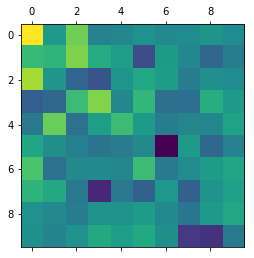

In [58]:
plt.matshow(corr_mat[3:13,:10])

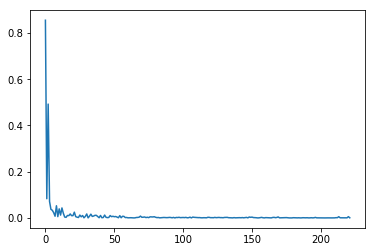

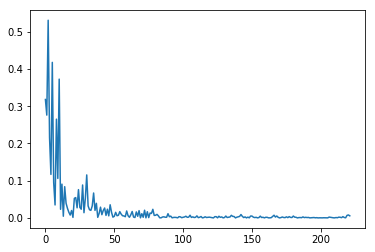

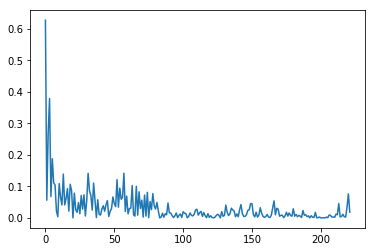

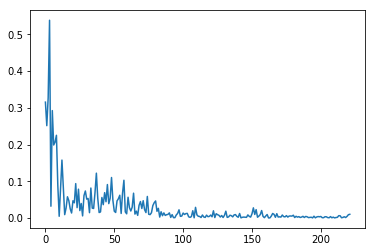

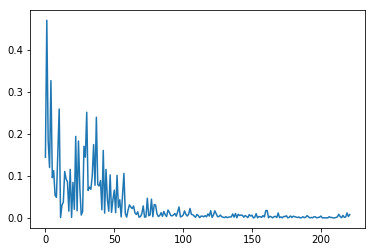

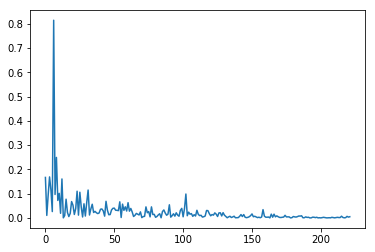

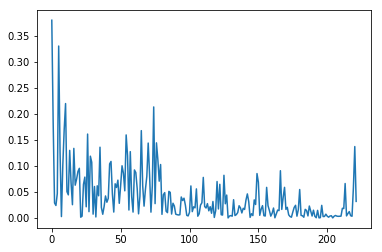

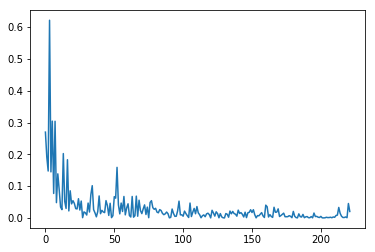

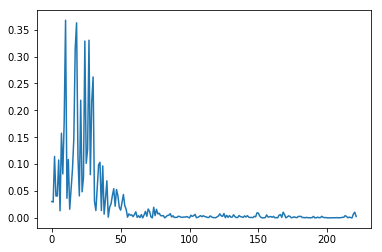

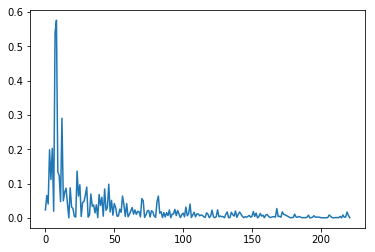

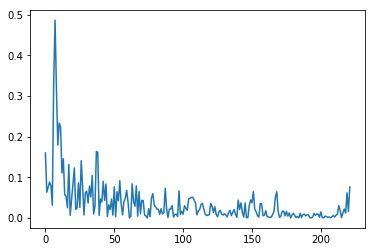

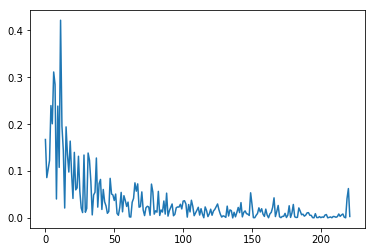

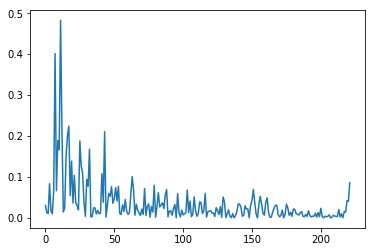

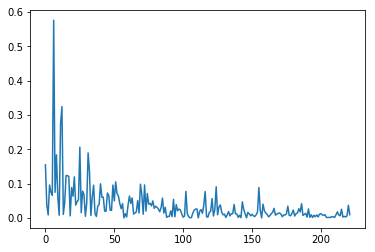

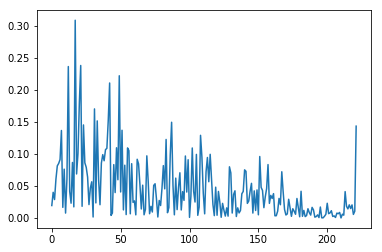

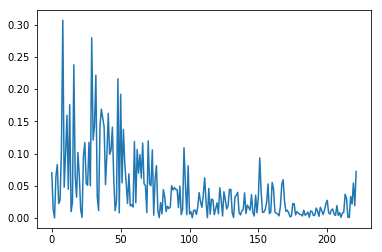

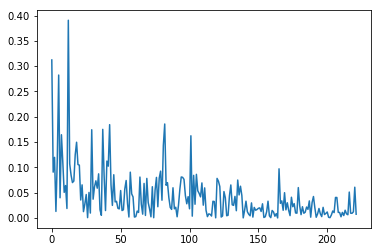

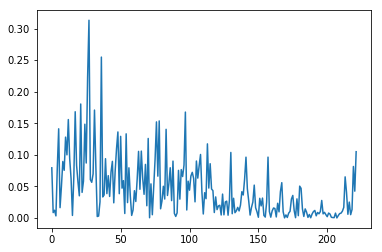

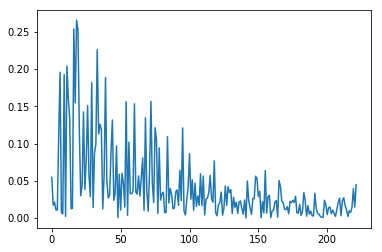

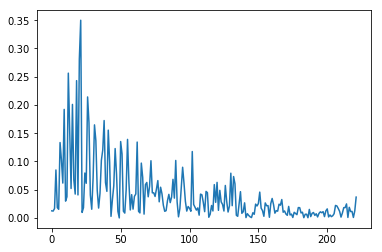

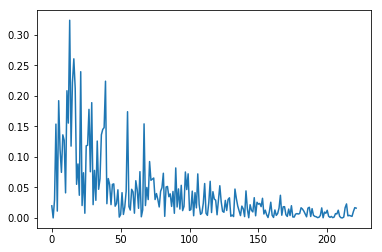

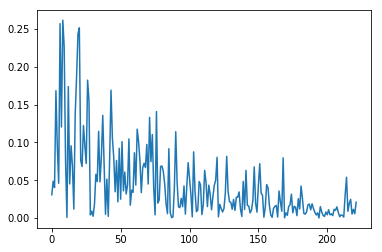

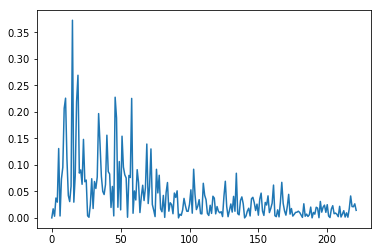

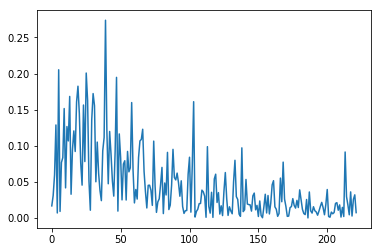

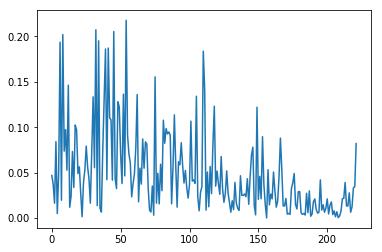

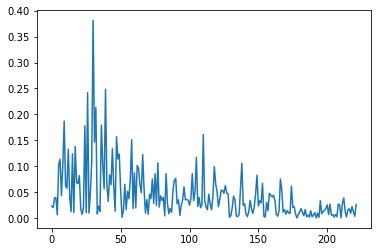

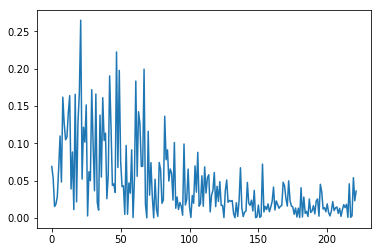

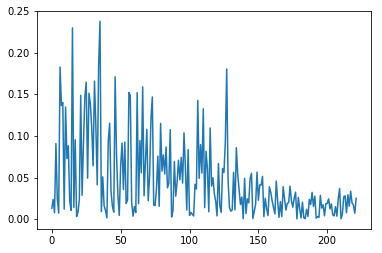

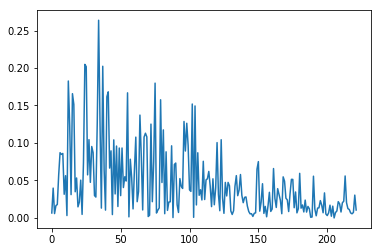

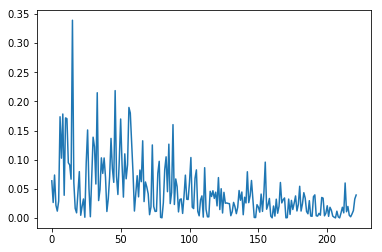

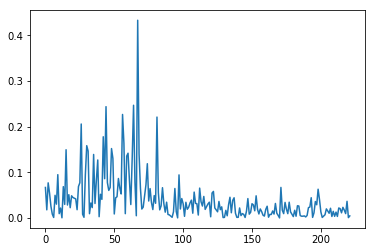

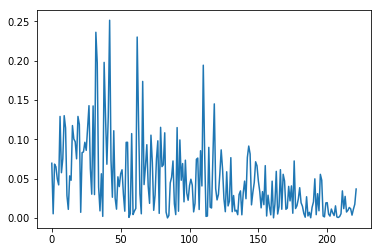

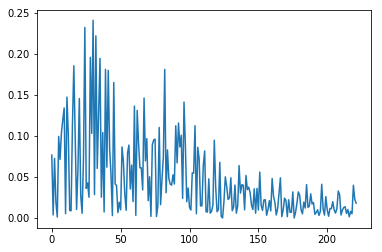

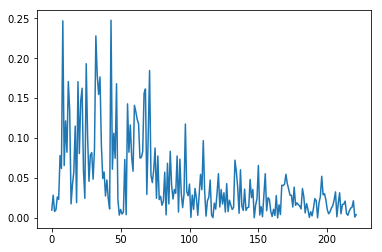

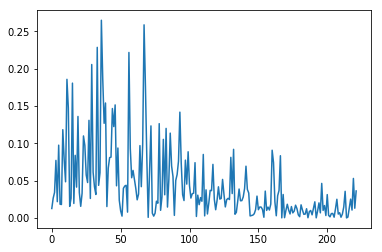

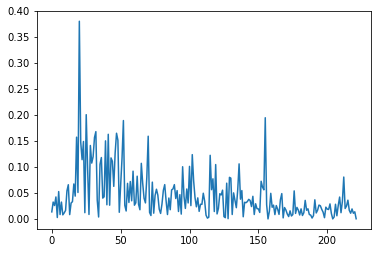

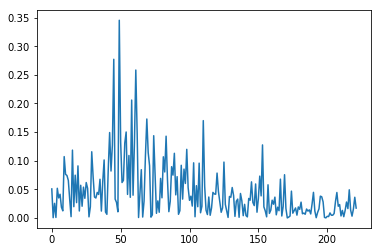

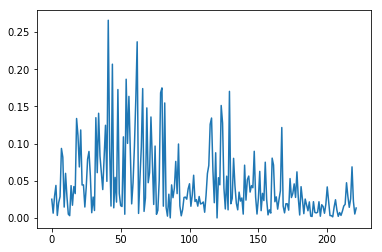

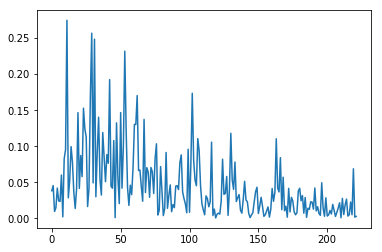

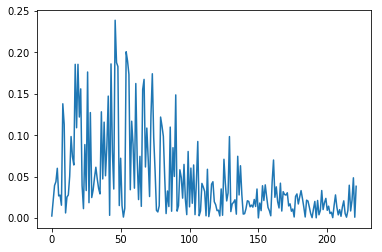

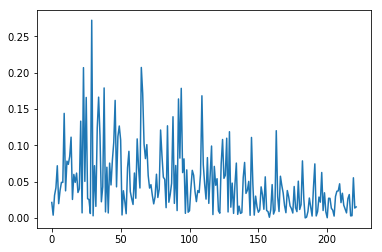

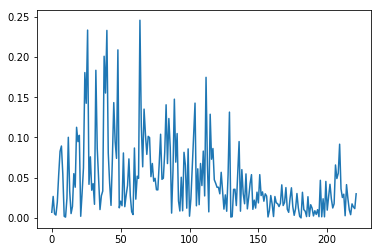

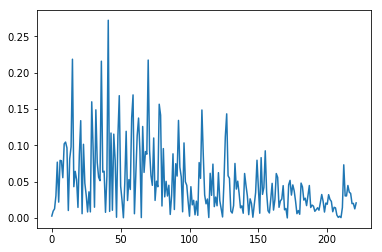

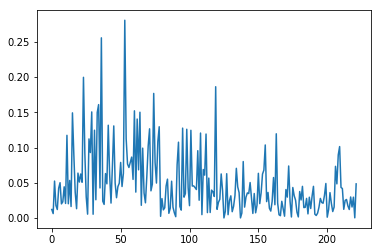

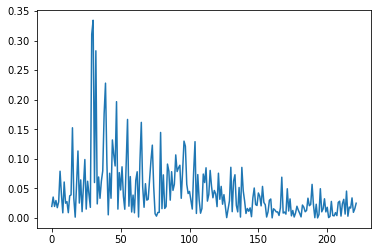

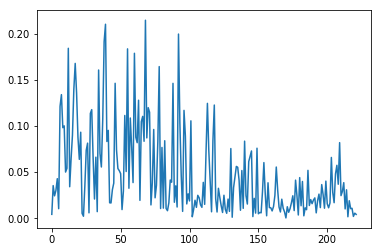

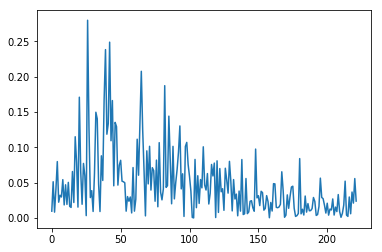

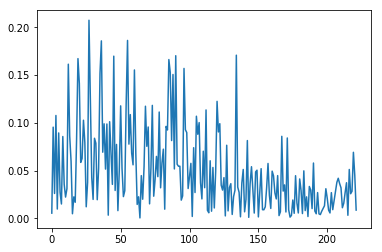

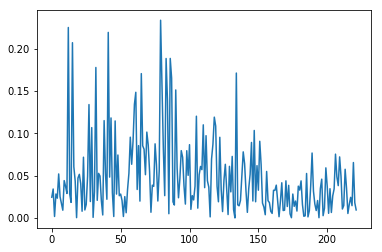

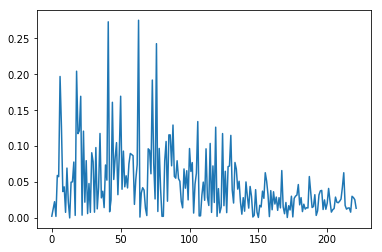

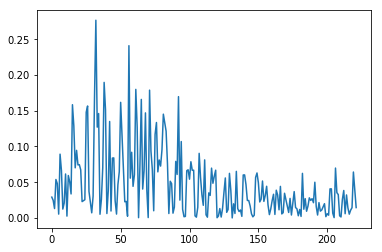

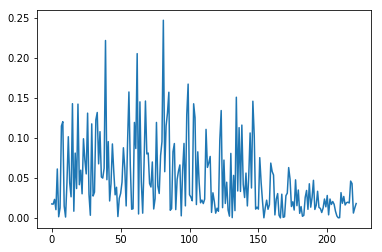

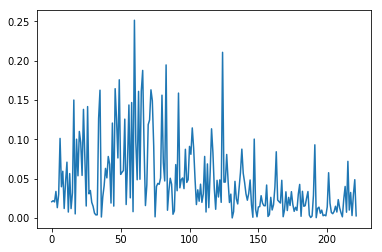

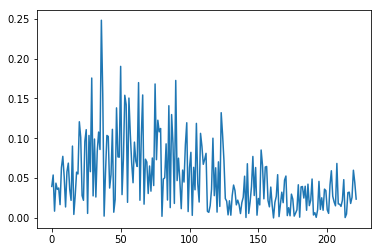

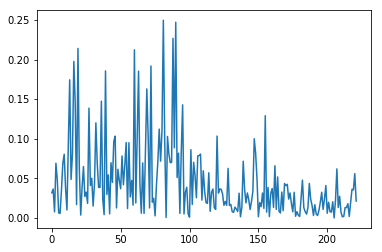

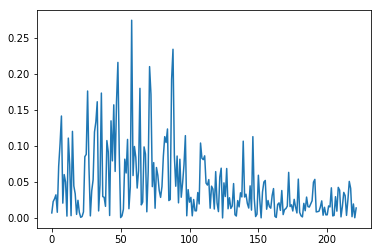

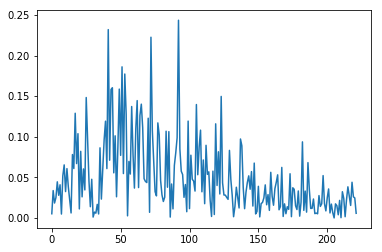

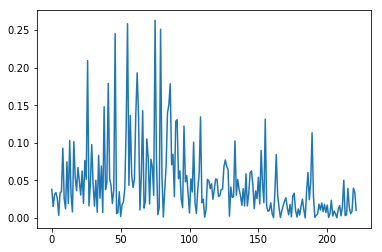

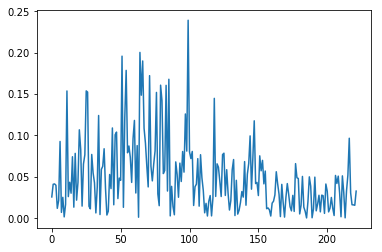

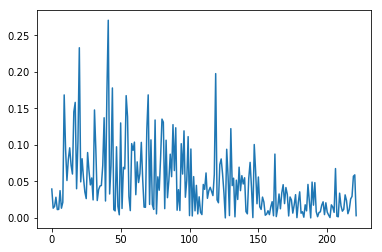

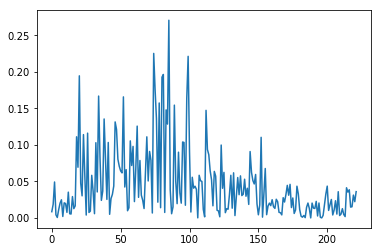

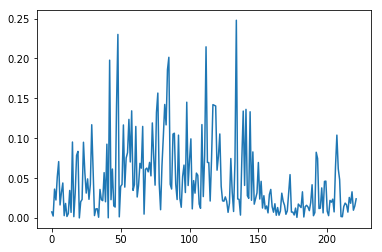

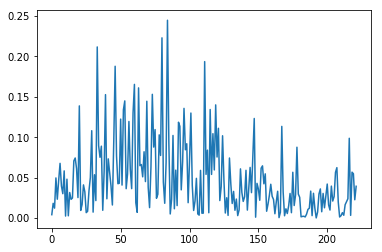

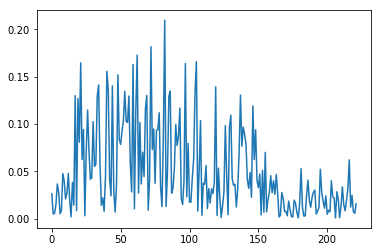

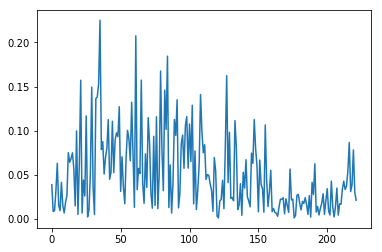

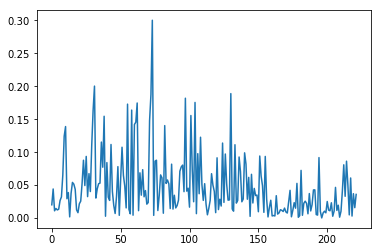

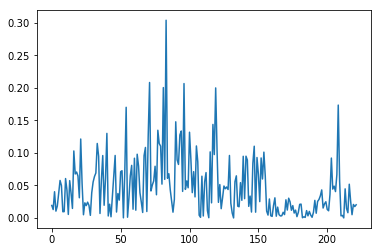

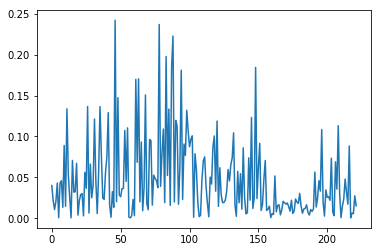

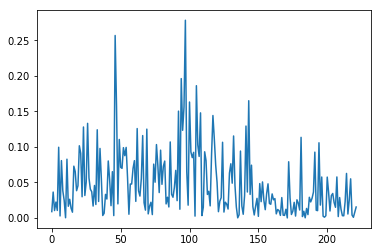

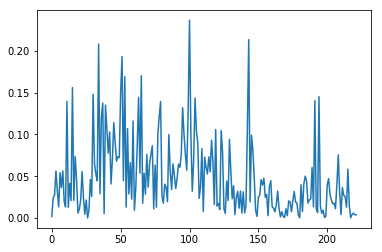

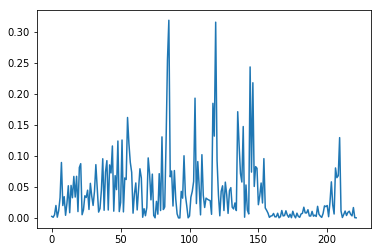

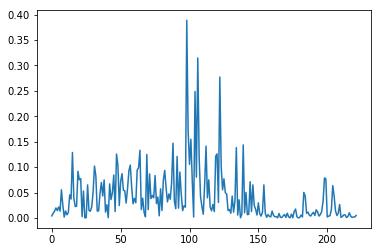

In [56]:
for i in range(3, corr_mat.shape[0]):
    plt.plot(abs(corr_mat[i,:]))
    plt.show()
    plt.close()

In [59]:
np.save('corr_mat.npy', corr_mat)

In [61]:
Q = np.reshape(np.loadtxt('../../Qmatrix'), (75, 75))


In [107]:
M = np.zeros((75, 76))
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        if i == j:
            M[i,j] = -1
        if i + 1 == j:
            M[i,j] = 1

In [97]:
Qp = np.matmul(np.linalg.inv(M)[:,1:], Q)

In [102]:
H = np.reshape(np.loadtxt('../../Hmatrix'), (76, 76))
U = np.load('../../Umatrix.npy')

In [110]:
A = np.matmul(M.T,np.matmul(np.linalg.inv(U), M))

In [111]:
HA = np.matmul(H, A)

In [116]:
QN_guess = np.matmul(np.linalg.pinv(M), Q)
for i in range(QN_guess.shape[1]):
    QN_guess[:, i] = QN_guess[:, i] / np.linalg.norm(QN_guess[:, i])
dummy = np.zeros((76, 76))
dummy[:, 0] = 1 / 76
dummy[:, 1:] = QN_guess 
QN_guess = dummy

In [127]:
QNINV = np.linalg.inv(QN_guess)

In [135]:
Q3NINV = np.kron(QNINV, np.ones((3,3)))

In [128]:
traj = np.load('../unformatted_traj.npy')
print(traj.shape)

In [136]:
xi = np.matmul(Q3NINV, traj)

In [ ]:
xi

In [146]:
xip = np.zeros_like(xi)
for i in range(xi.shape[0]):
    xip[i,:] = xi[i,:] - xi[i,:].mean()

In [186]:
xip[3,:].var()

0.25633912385002916

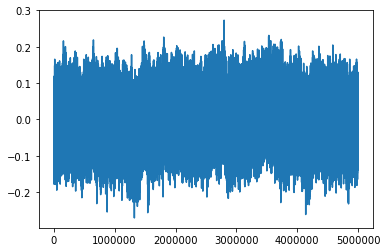

In [191]:
plt.plot(xi[100,:])

In [155]:
RT = np.load('../com_Rmatrix.npy').T
PC = np.matmul(RT, traj)
RINV = np.load('../com_HCINVmatrix.npy')
PC_HA = np.matmul(RINV, traj)

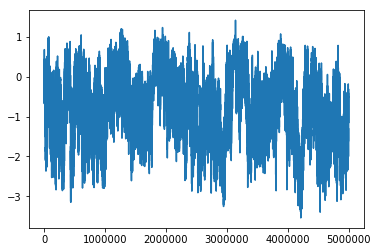

In [154]:
plt.plot(PC[0,:])

In [157]:
xip_hat = np.zeros_like(xip)
PC_hat = np.zeros_like(PC)
PC_HA_hat = np.zeros_like(PC_HA)

for i in range(xip.shape[0]):
    xip_hat[i,:] = (xip[i,:] - xip[i,:].mean()) / xip[i,:].std()
    PC_hat[i,:] = (PC[i,:] - PC[i,:].mean()) / PC[i,:].std()
    PC_HA_hat[i,:] = (PC_HA[i,:] - PC_HA[i,:].mean()) / PC_HA[i,:].std()

In [182]:
xip_hat[6,:]

array([1.43290874, 1.34286269, 0.86090253, ..., 1.14818732, 1.07128439,
       0.88372222])

In [168]:
corr_mat = np.zeros((76, 222))
corr_mat_HA = np.zeros((76, 222))
for n, i in enumerate(range(0, xip_hat.shape[0], 3)):
    print(n)
    for j in range(PC_hat.shape[0] - 6):
        corr_mat[n, j] = np.dot(xip_hat[i,:], PC_hat[j,:]) / len(PC_hat[j,:])
        corr_mat_HA[n, j] = np.dot(xip_hat[i,:], PC_HA_hat[j,:]) / len(PC_HA_hat[j,:])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75


In [173]:
corr_mat

array([[-3.58792095e-01,  1.78589459e-01, -6.57657051e-01, ...,
         5.92909605e-04, -3.57630901e-04, -1.99949971e-03],
       [ 8.15633637e-01, -5.40624214e-02,  4.79057769e-01, ...,
         1.04360023e-03,  5.56452906e-03, -1.04453401e-03],
       [ 7.87783791e-01, -1.86047818e-01, -3.90452765e-01, ...,
        -1.56878711e-03, -1.29987773e-03,  1.18806647e-02],
       ...,
       [ 2.72968136e-03, -2.36856748e-02, -2.70271004e-02, ...,
        -5.63020566e-03, -3.76159699e-03, -3.71401393e-03],
       [ 3.41615780e-03, -4.09282988e-04, -5.36760859e-03, ...,
         1.69374656e-02, -4.96607859e-04,  2.88531654e-04],
       [-3.52272337e-03,  9.64745803e-03, -1.35066168e-02, ...,
        -1.66598621e-03, -1.87667351e-03, -4.72082456e-03]])

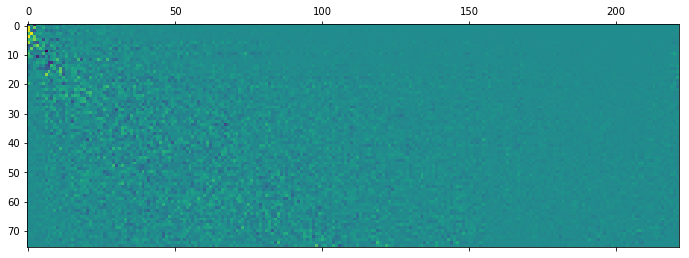

In [174]:
plt.matshow(corr_mat[:, :])

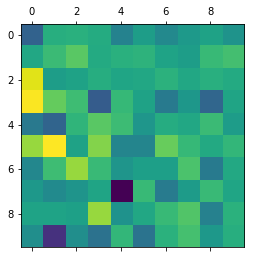

In [194]:
plt.matshow(corr_mat[2:12, 2:12])

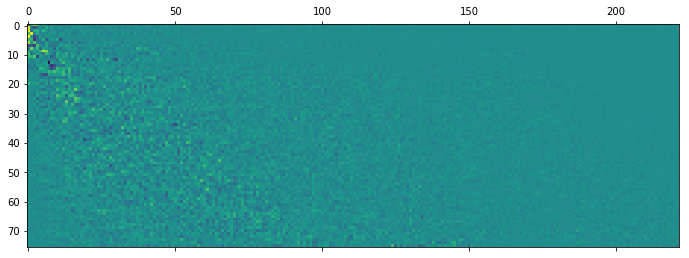

In [172]:
plt.matshow(corr_mat_HA[:, :])

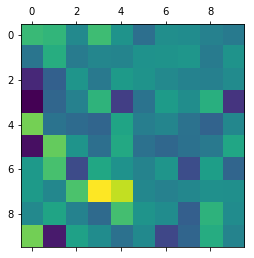

In [195]:
plt.matshow(corr_mat_HA[2:12, 2:12])

In [196]:
R = np.load('../com_Rmatrix.npy')
RHA = np.load('../com_HCmatrix.npy')

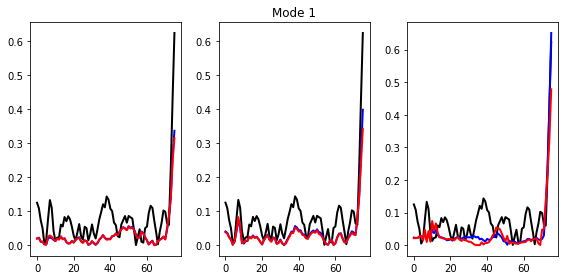

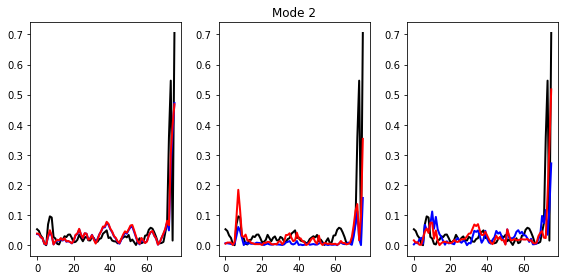

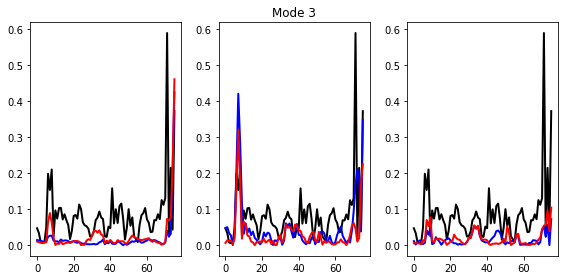

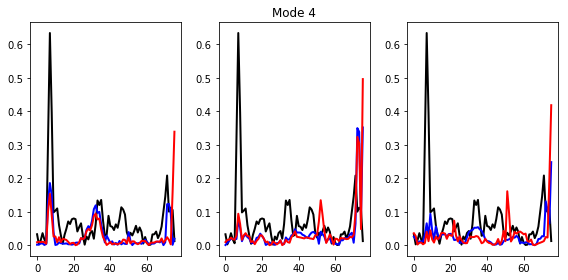

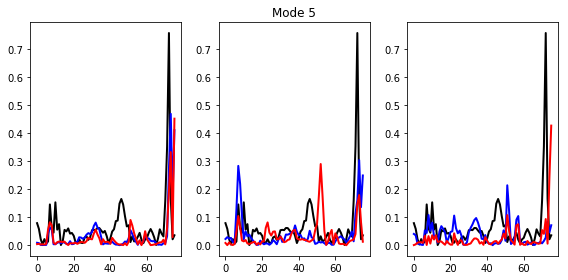

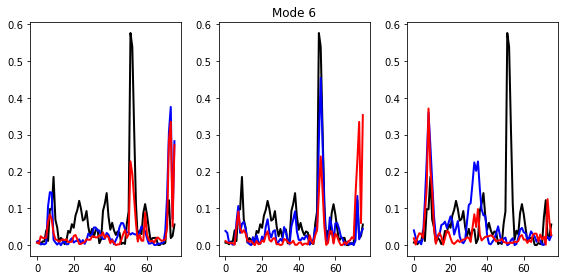

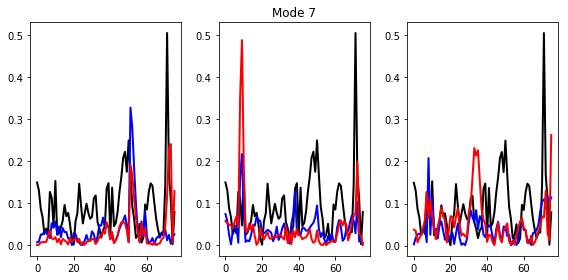

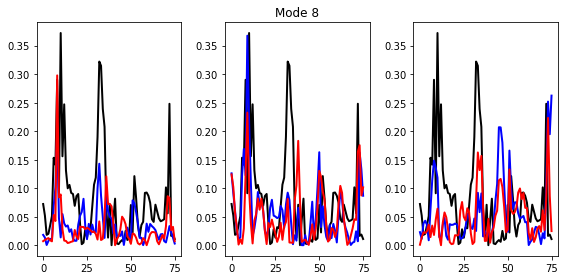

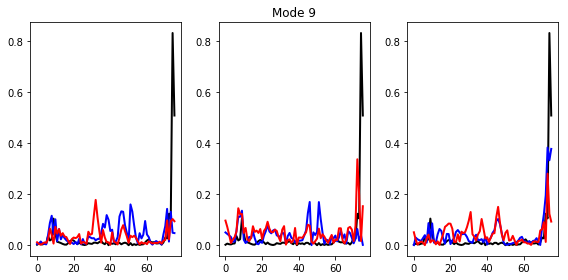

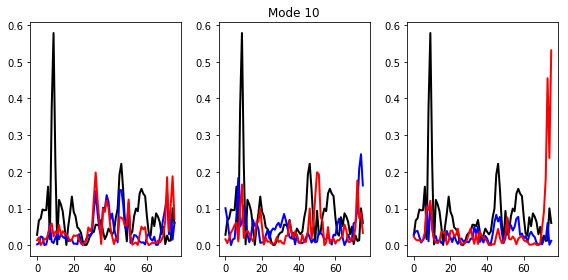

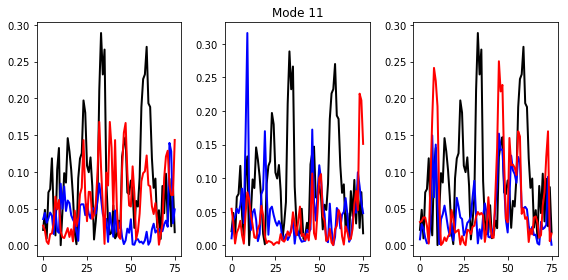

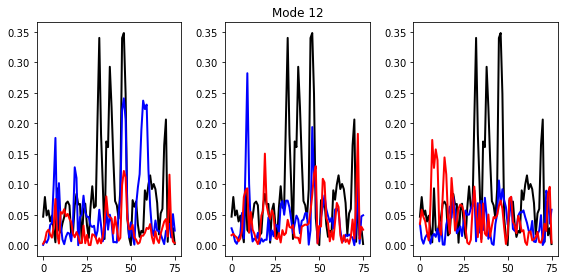

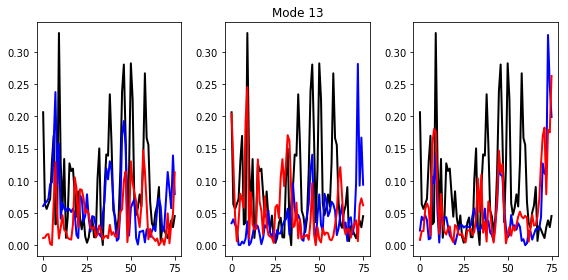

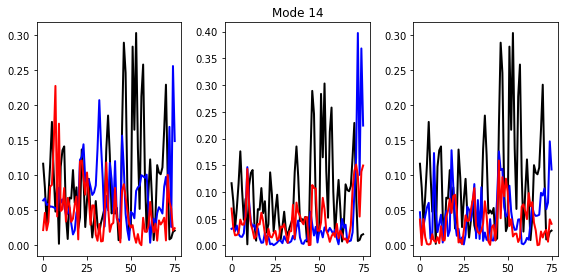

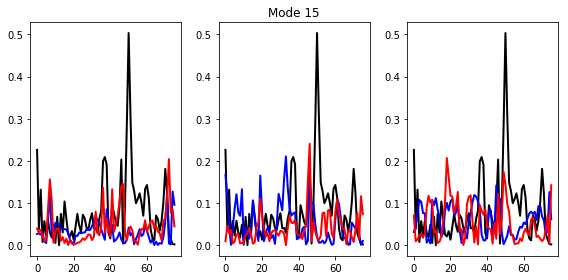

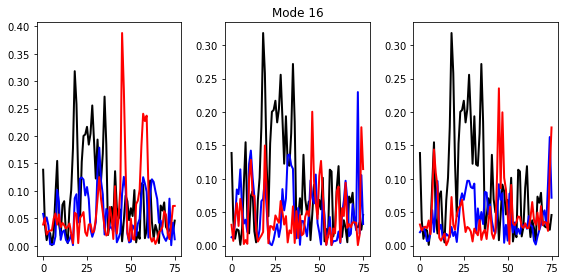

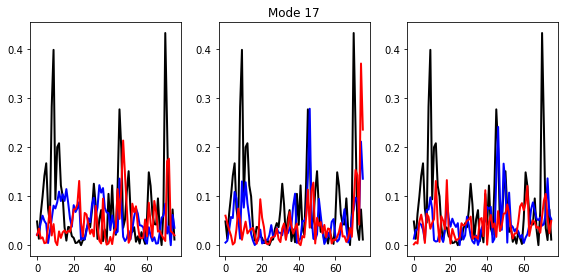

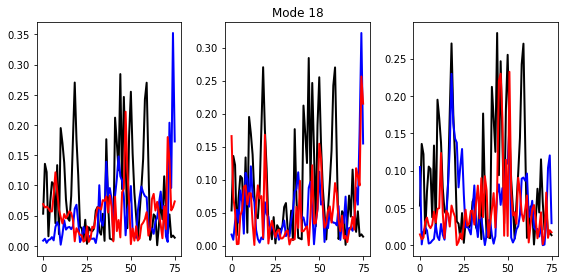

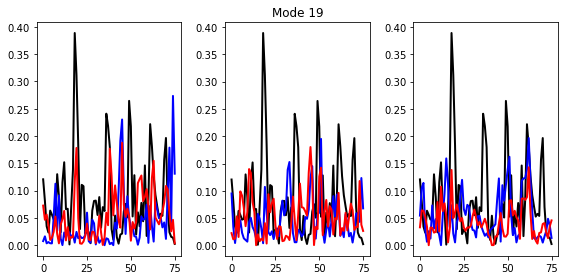

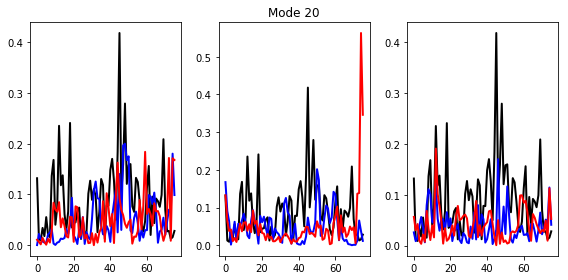

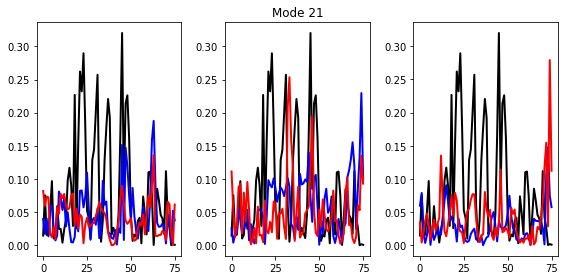

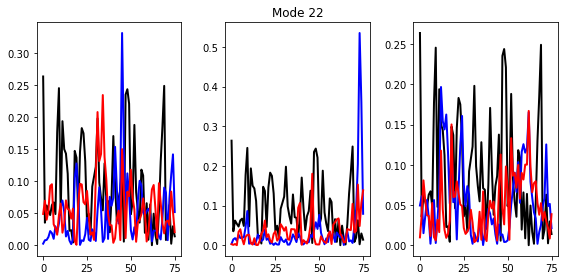

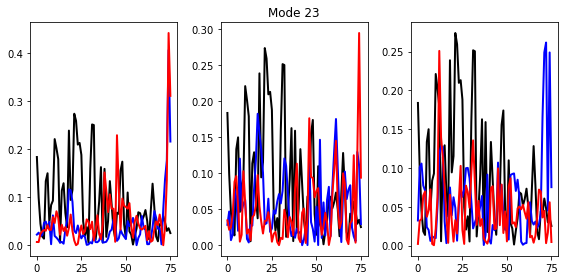

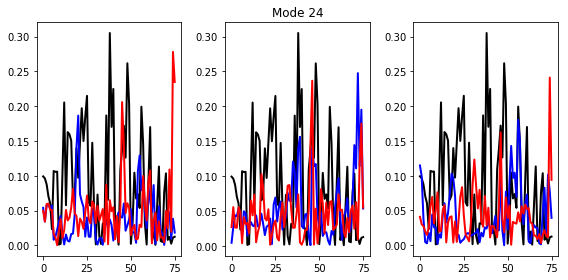

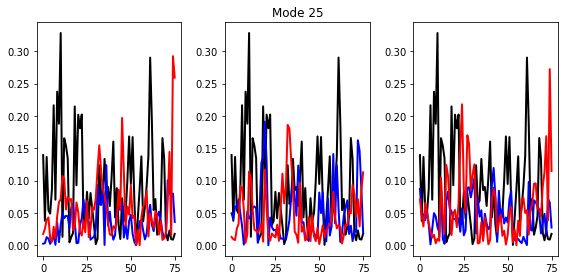

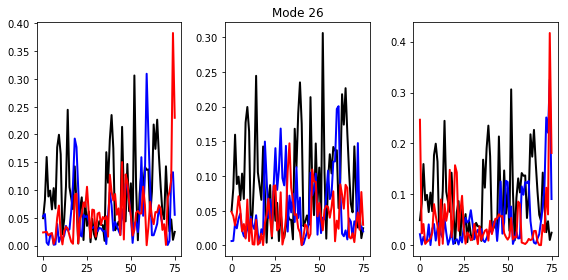

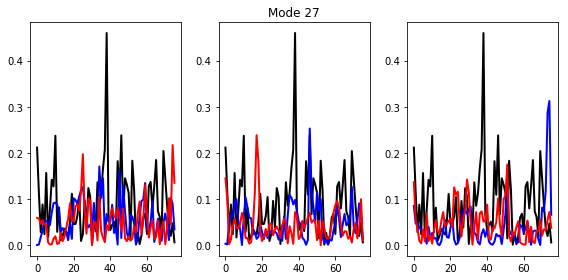

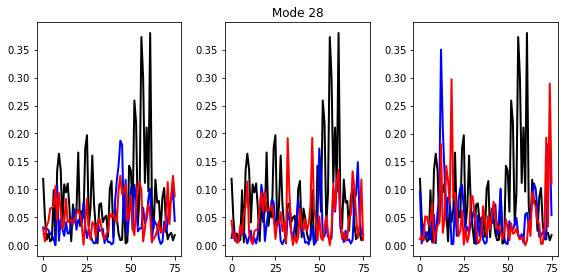

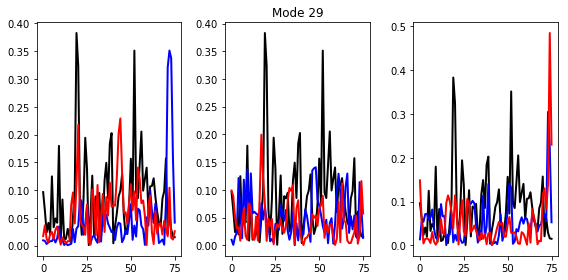

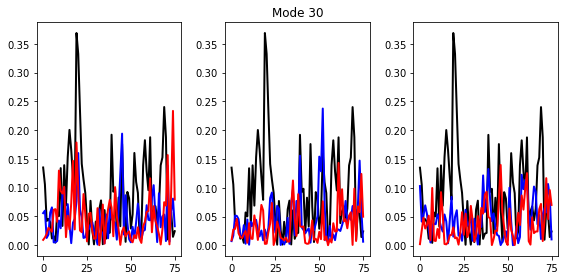

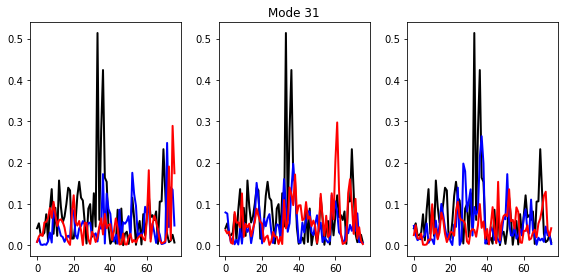

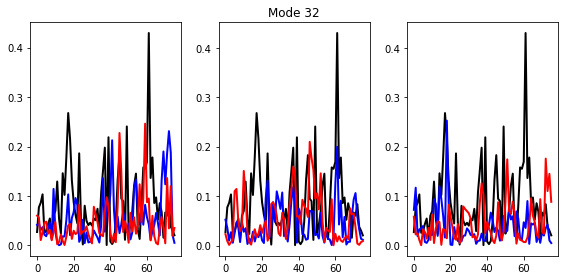

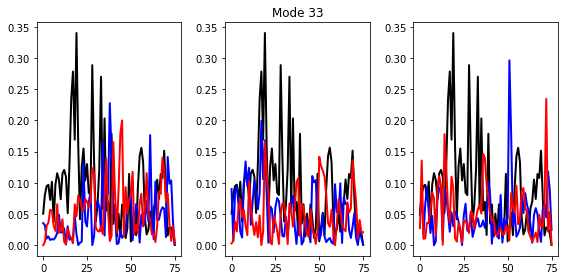

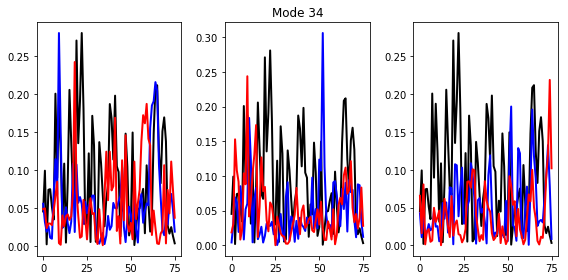

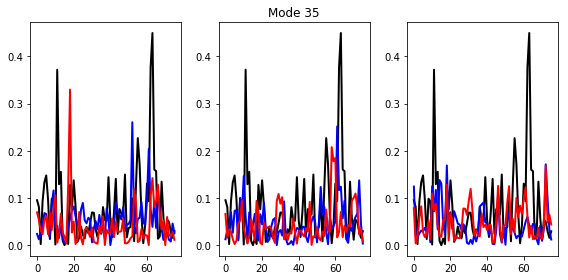

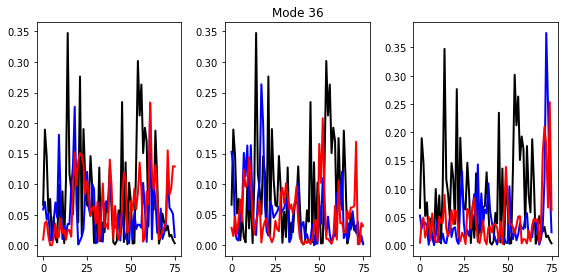

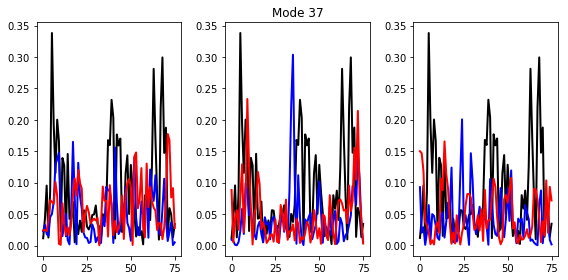

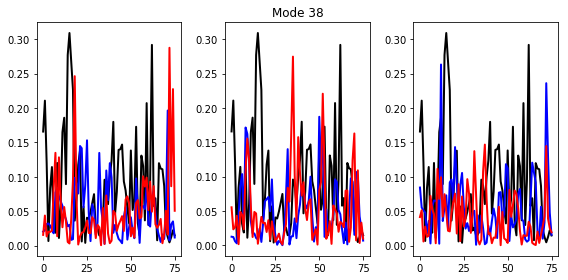

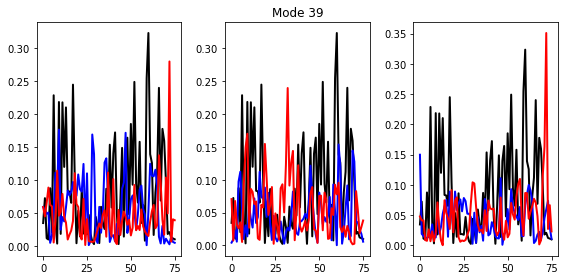

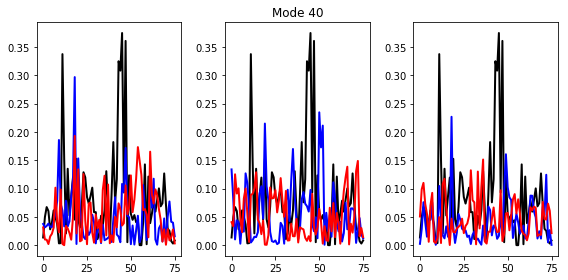

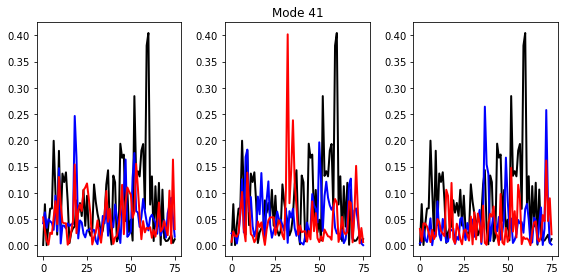

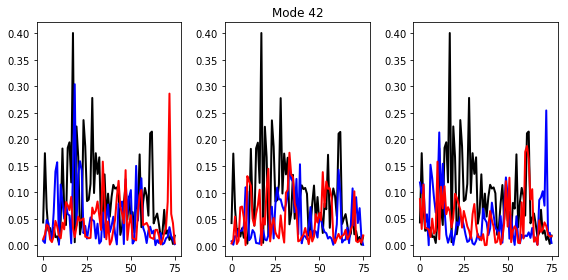

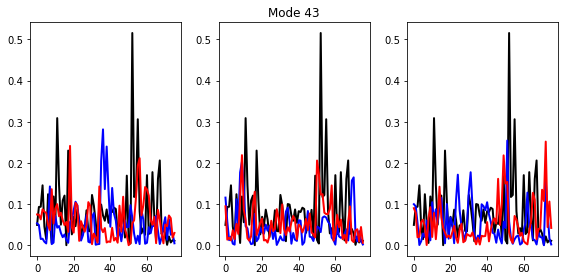

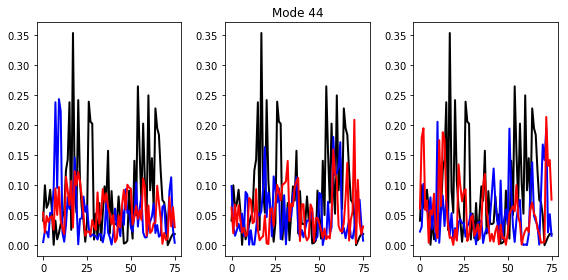

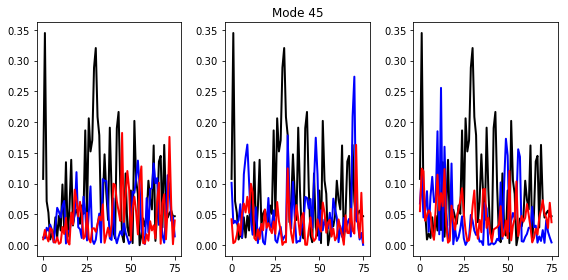

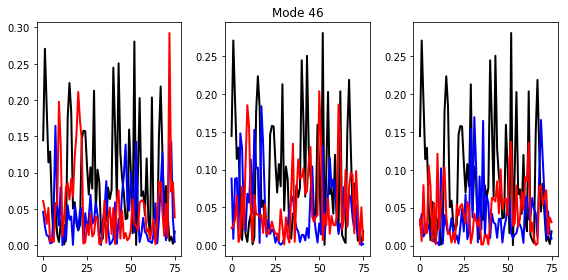

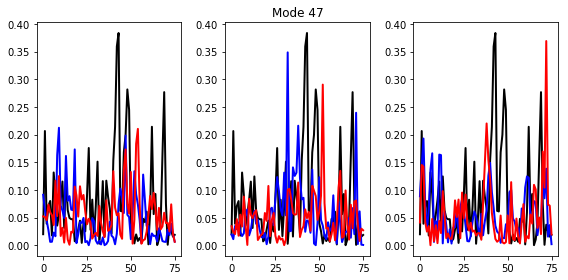

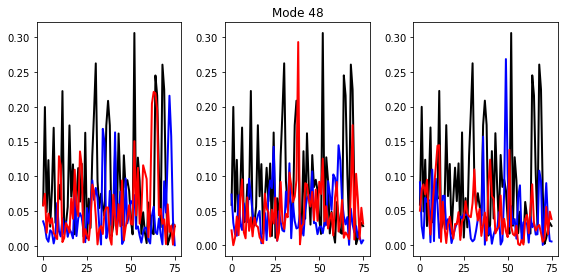

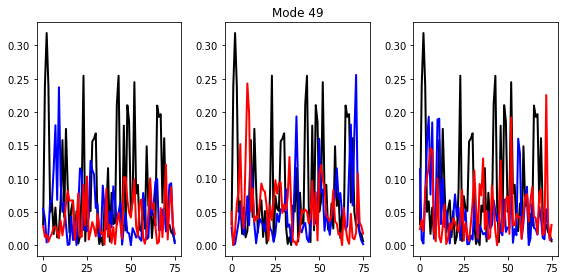

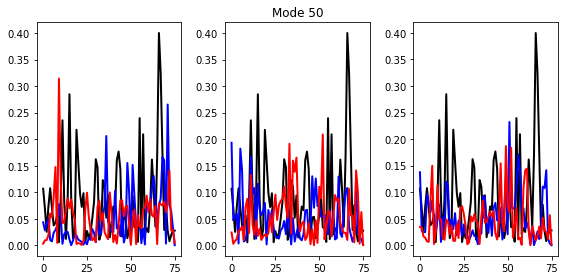

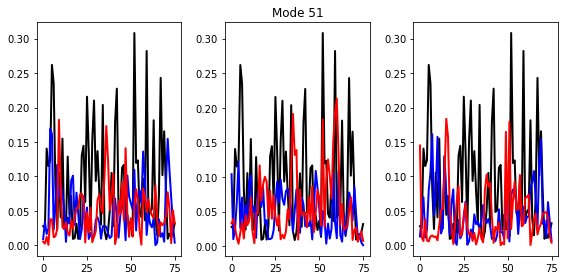

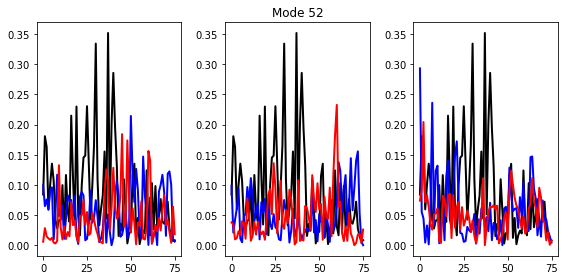

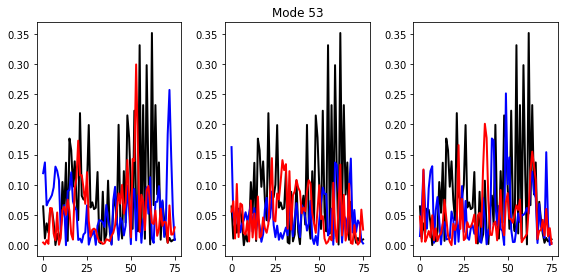

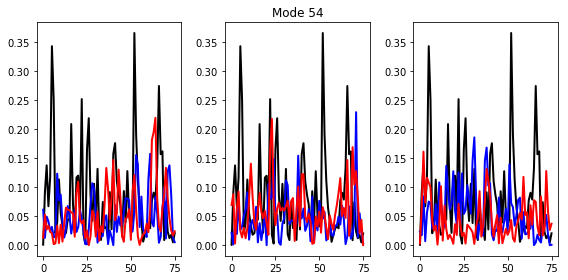

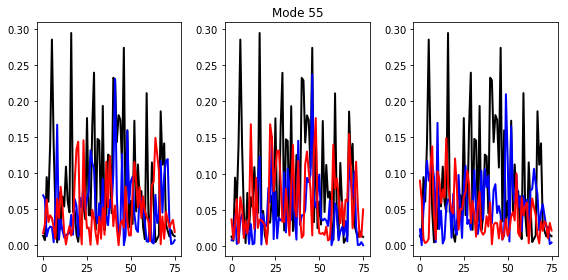

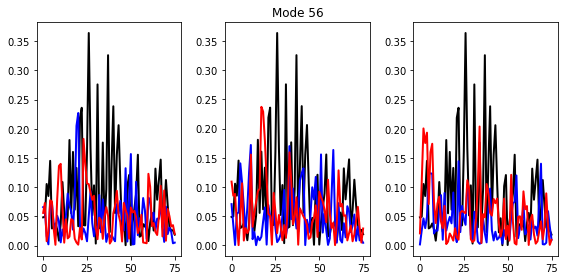

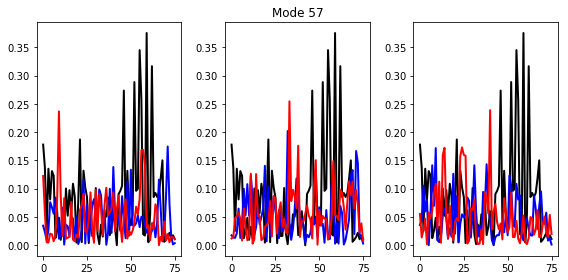

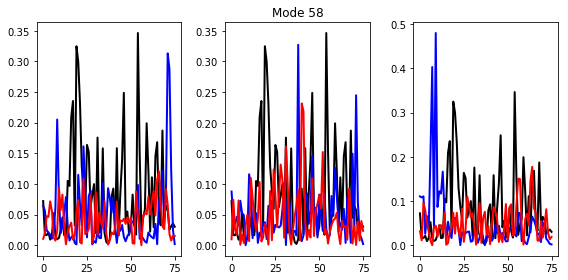

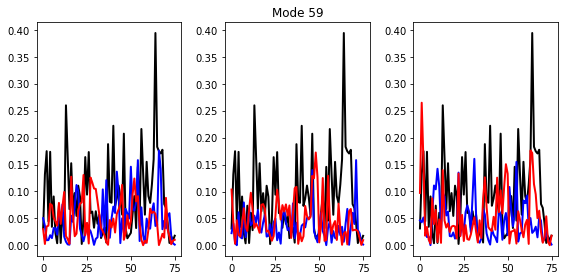

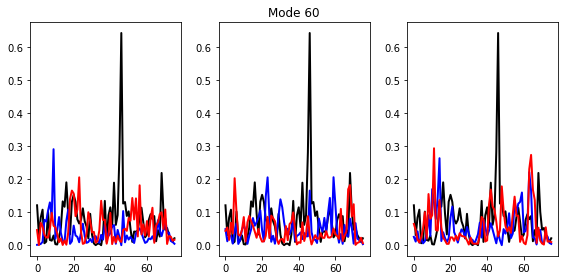

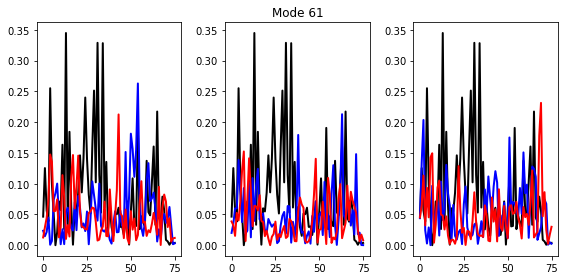

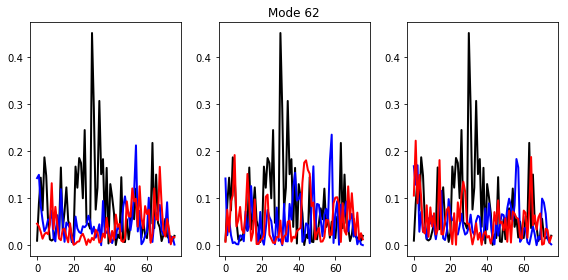

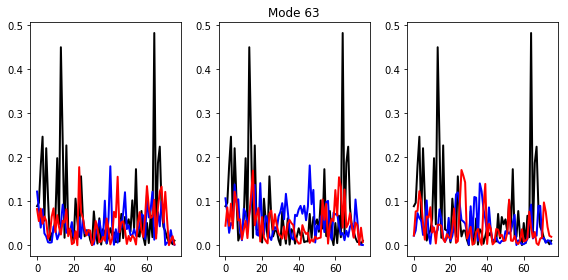

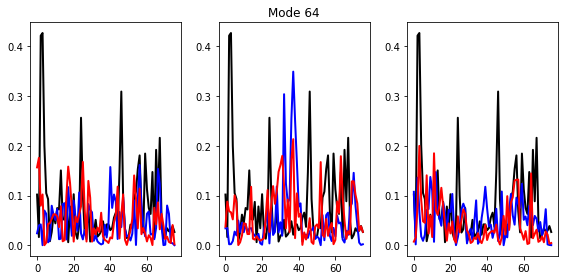

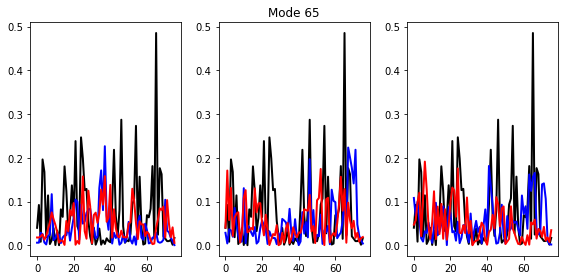

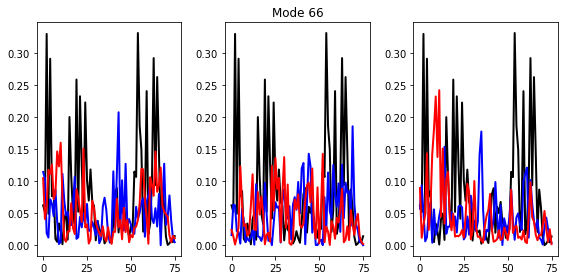

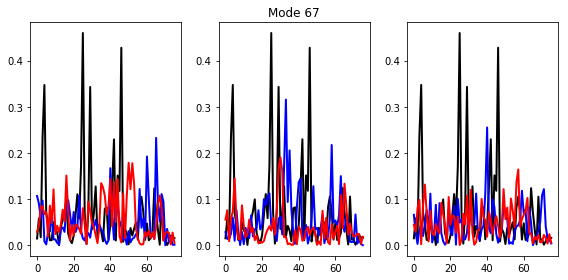

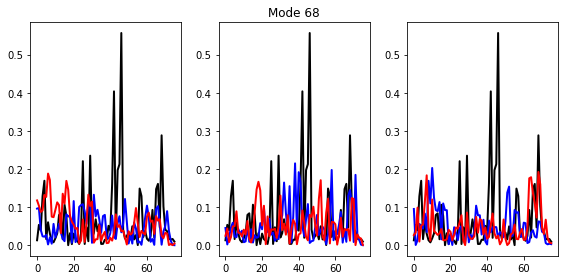

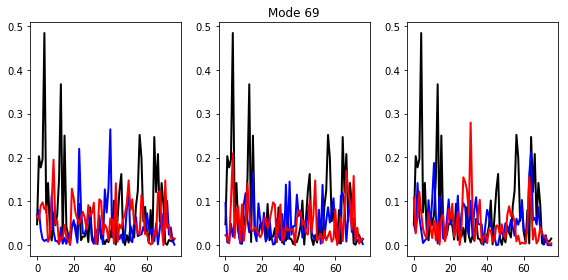

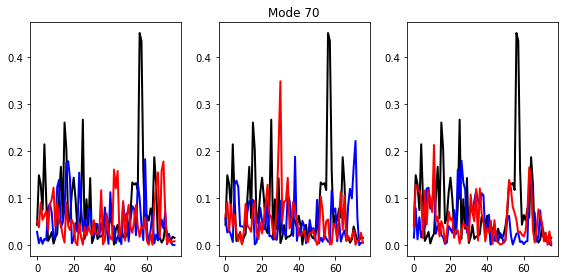

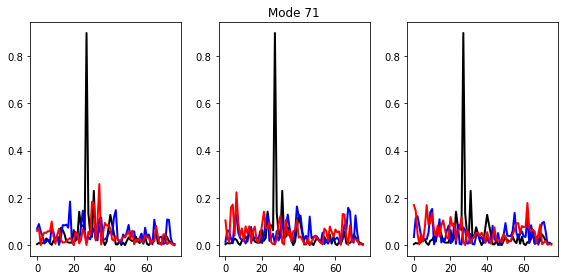

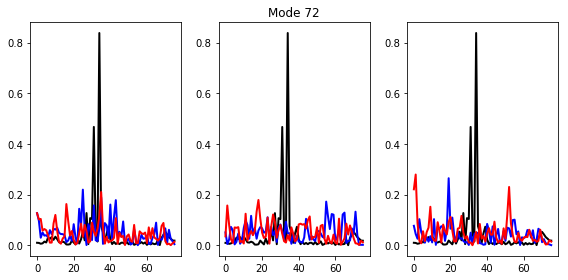

In [220]:
for n, i in enumerate(range((QN_guess.shape[0] - 4))):
    fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize = (8, 4))
    ax0.plot(abs(QN_guess[:,n + 4]), lw = 2, c = 'k')
    ax0.plot(abs(R[::3,i]), lw = 2, c = 'b')
    ax0.plot(abs(RHA[::3,i]), lw = 2, c = 'r')
    
    ax1.plot(abs(QN_guess[:,n + 4]), lw = 2, c = 'k')
    ax1.plot(abs(R[1::3,i + 1]), lw = 2, c = 'b')
    ax1.plot(abs(RHA[1::3,i + 1]), lw = 2, c = 'r')
    ax1.set_title('Mode ' + str(i + 1))
    ax2.plot(abs(QN_guess[:,n + 4]), lw = 2, c = 'k')
    ax2.plot(abs(R[2::3,i + 2]), lw = 2, c = 'b')
    ax2.plot(abs(RHA[2::3,i + 2]), lw = 2, c = 'r')
    
    plt.tight_layout()
    plt.show()
    plt.close()

In [210]:
Q3N_guess = np.kron(QN_guess, np.ones((3,3)))
for i in range()

In [248]:
overlap = np.zeros((72, 222))

for n, i in enumerate(range(4, 76)):
    dummy = QN_guess[:,i] / np.sqrt(3)
    for j in range(222):
        overlap[n,j] = abs(np.dot(dummy, RT[j,::3]) + np.dot(dummy, RT[j,1::3]) + np.dot(dummy, RT[j,2::3]))

In [250]:
overlap[0,:]

array([4.80468322e-01, 7.55132196e-02, 6.27169059e-01, 8.45519974e-02,
       6.07154451e-02, 1.99686050e-03, 6.98502112e-02, 4.42710975e-02,
       1.42395454e-01, 6.17153868e-03, 2.37586211e-02, 7.48311593e-02,
       1.95092757e-01, 4.76850538e-02, 2.18063207e-02, 9.68270116e-03,
       3.22809336e-02, 7.07118213e-02, 1.18365007e-01, 4.18483513e-02,
       9.85802432e-02, 1.23284846e-01, 6.61045358e-03, 3.58201606e-03,
       6.88963634e-03, 1.12679373e-01, 2.46051761e-02, 1.47367297e-01,
       4.62178894e-02, 8.95352978e-02, 6.37370738e-02, 1.79418951e-02,
       5.57582381e-02, 9.95848206e-02, 8.19558125e-02, 8.90501804e-02,
       1.20710302e-01, 3.32643724e-02, 2.60806238e-02, 3.36761481e-02,
       6.04214887e-02, 4.02985182e-02, 1.70716314e-02, 9.61611691e-02,
       4.77567478e-02, 2.74300863e-02, 6.36606253e-02, 8.21133943e-02,
       1.99694395e-02, 8.63993766e-02, 1.57389953e-02, 6.04038542e-02,
       1.17593229e-01, 5.10540887e-02, 7.42675015e-02, 3.56840869e-02,
      

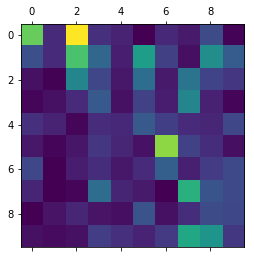

In [249]:
plt.matshow(overlap[:10, :10])

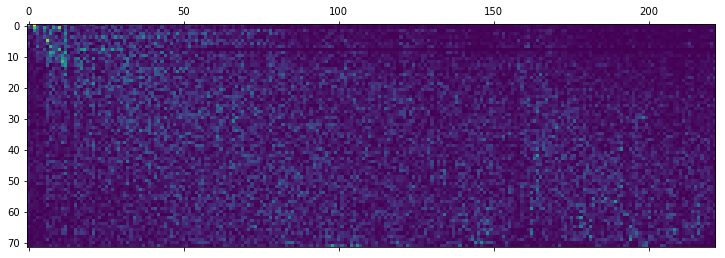

In [251]:
plt.matshow(overlap)

In [224]:
for i in range(4, 76):
    print(np.dot(QN_guess[:,i], RT[i - 4,::3]) + np.dot(QN_guess[:,i], RT[i - 4,1::3]) + np.dot(QN_guess[:,i], RT[i - 4,2::3]))

0.8321955443885193
0.1292340551794528
-0.4926275981019427
0.3034666344712793
0.12707100244767594
0.05206096700758453
-0.3294409823818757
-0.6883633776102906
0.2512902782760841
-0.17820271695775308
-0.32467910481591133
0.5769480045564989
-0.5205396417213961
0.06925460093006716
-0.004663399211376387
0.1928953111351668
0.06267979517339586
0.14109960359538484
0.2612366045060492
-0.10777416848243931
0.035962154657217055
-0.00026169995071366123
0.15475263386969473
0.0011509955021641038
0.12845154467503833
0.12200121157988864
0.033734341017511695
0.06391055269931555
-0.03376550437040598
-0.04947271639394206
0.14451879710496524
-0.12972446837611132
0.21134011076035245
0.10471808855890366
-0.12825872885650175
-0.10422901516370965
0.07879195870649502
-0.08729489997411212
0.14077959884246094
-0.057051068914797914
-0.014004146861278956
-0.0589422748949864
0.00592554111562793
-0.08515847112943727
-0.04495454751053689
-0.06044160039103422
0.06965081622065245
-0.05493355746790317
0.2890951120883
-0.0